## Data Scraping

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs 
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [4]:
def scrape(url):
    d = webdriver.Chrome(ChromeDriverManager().install())
    d.get(url)
    s = bs(d.page_source, 'html.parser').find('table', {'class':'table'})
    headers, [_, *data] = [i.text for i in s.find_all('th')], [[i.text for i in b.find_all('td')] for b in s.find_all('tr')]
    final_data = [i for i in data if len(i) > 1]
    data_attrs = [dict(zip(headers, i)) for i in final_data]
    df = pd.DataFrame(data_attrs)
    df['Team'] = df['Team'].str.replace(r'\n', '')
    df = df.set_index("Team")
    return df

In [458]:
drives = scrape('https://stats.nba.com/teams/drives/?Season=2018-19&SeasonType=Regular%20Season')

In [8]:
drives = drives[["DRIVES"]]

In [459]:
CandS = scrape('https://stats.nba.com/teams/catch-shoot/?Season=2018-19&SeasonType=Regular%20Season')
CandS = CandS[["PTS"]]

In [460]:
passing = scrape('https://stats.nba.com/teams/passing/?sort=PASSES_MADE&dir=1&Season=2018-19&SeasonType=Regular%20Season')
passing = passing[["PassesMade", "SecondaryAST"]]

In [461]:
touches = scrape('https://stats.nba.com/teams/touches/?Season=2018-19&SeasonType=Regular%20Season')
touches = touches[["TOUCHES", "PaintTouches", "PostUps"]]

In [462]:
pullup = scrape('https://stats.nba.com/teams/pullup/?Season=2018-19&SeasonType=Regular%20Season')

In [19]:
pullup = pd.DataFrame(pullup.iloc[:,15])
pullup.columns = ["PullUpPoints"]
misc = pd.read_excel("data/misc2019.xlsx")

In [20]:
hustle = pd.read_excel("data/hustle2018-19.xlsx")
hustle = hustle.rename(columns = {'TEAM' : 'Team'})
hustle = hustle.set_index("Team")

In [21]:
full_advanced = pd.concat([drives, CandS, pullup,touches, passing, hustle], axis=1, sort = True)
# full_advanced.to_excel("full_advanced2019.xlsx")

## Data Cleaning

In [5]:
def clean(df, opp):
    if (opp):
        df.drop(["Rk","G", "MP"], axis = 1, inplace = True)
        df.columns = ['op_' + str(col) for col in df.columns]
        df = df.rename(columns = {'op_Team' : 'Team'})
        df['Team'] = df['Team'].str.replace(r'*', '')
        df = df.set_index("Team")
    else:  
        df['Team'] = df['Team'].str.replace(r'*', '')
        df.drop(["Rk","G", "MP"], axis = 1, inplace = True)
        df = df.set_index("Team")
    return df

### 2019-20 Season Data (Incomplete Season)

In [6]:
basic20 = pd.read_csv("data/basic2019-20.csv")
basic_opp20 = pd.read_csv("data/basic_opp2019-20.csv")
advanced20 = pd.read_excel("data/advanced2018-19.xlsx").set_index("Team")

In [7]:
basic20 = clean(basic20, False)
basic_opp20 = clean(basic_opp20, True)

In [8]:
basic20 = pd.concat([basic20, basic_opp20], axis=1, sort = True)
basic20 = basic20.round(3)
# basic20.to_excel("basic2019-20_labels.xlsx")

In [9]:
s2020 = pd.read_excel("data/basic2019-20_labels.xlsx").set_index("Team")
s2020 = pd.concat([s2020, advanced20], axis=1, sort = True)
s2020.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2020.to_excel("s2019-20.xlsx")

### 2018-19 Season Data

In [10]:
basic19 = pd.read_csv("data/basic2018-19.csv")
basic_opp19 = pd.read_csv("data/basic_opp2018-19.csv")
advanced19 = pd.read_excel("data/advanced2018-19.xlsx").set_index("Team")

In [11]:
basic19 = clean(basic19, False)
basic_opp19 = clean(basic_opp19, True)
basic19 = pd.concat([basic19, basic_opp19], axis=1, sort = True)
basic19 = basic19.round(3)

In [12]:
basic19.insert(len(basic19.columns),'Star_Power',0)
basic19.loc["Milwaukee Bucks", "Star_Power"] = 1
basic19.loc["Houston Rockets", "Star_Power"] = 1
basic19.loc["Oklahoma City Thunder", "Star_Power"] = 1
basic19.loc["Denver Nuggets", "Star_Power"] = 1
basic19.loc["Golden State Warriors", "Star_Power"] = 1
# basic19.to_excel("basic19_labels.xlsx")

In [13]:
s2019 = pd.read_excel("data/basic2018-19_labels.xlsx").set_index("Team")
s2019 = pd.concat([s2019, advanced19], axis=1, sort = True)
full_advanced2019 = pd.read_excel("data/full_advanced2018-19.xlsx")
full_advanced2019 = full_advanced2019.set_index("Team")
s2019_full = pd.concat([s2019, advanced19, full_advanced2019], axis=1, sort = True)
s2019.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2019.to_excel("s2018-19.xlsx")

### 2017-18 Season Data

In [14]:
basic18 = pd.read_csv("data/basic2017-18.csv")
basic_opp18 = pd.read_csv("data/basic_opp2017-18.csv")
advanced18 = pd.read_excel("data/advanced2017-18.xlsx").set_index("Team")

In [15]:
basic18 = clean(basic18, False)
basic_opp18 = clean(basic_opp18, True)
basic18 = pd.concat([basic18, basic_opp18], axis=1, sort = True)
basic18 = basic18.round(3)

In [16]:
basic18.insert(len(basic18.columns),'Star_Power',0)
basic18.loc["Cleveland Cavaliers", "Star_Power"] = 1
basic18.loc["Houston Rockets", "Star_Power"] = 1
basic18.loc["Oklahoma City Thunder", "Star_Power"] = 1
basic18.loc["Portland Trail Blazers", "Star_Power"] = 1
basic18.loc["New Orleans Pelicans", "Star_Power"] = 1

In [17]:
s2018 = pd.read_excel("data/basic2017-18_labels.xlsx").set_index("Team")
s2018 = pd.concat([s2018, advanced18], axis=1, sort = True)
s2018.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2018.to_excel("s2017-18.xlsx")

### 2016-17 Season Data

In [18]:
basic17 = pd.read_csv("data/basic2016-17.csv")
basic_opp17 = pd.read_csv("data/basic_opp2016-17.csv")
advanced17 = pd.read_excel("data/advanced2016-17.xlsx").set_index("Team")

In [19]:
basic17 = clean(basic17, False)
basic_opp17 = clean(basic_opp17, True)
basic17 = pd.concat([basic17, basic_opp17], axis=1, sort = True)
basic17 = basic17.round(3)

In [20]:
basic17.insert(len(basic17.columns),'Star_Power',0)
basic17.loc["Cleveland Cavaliers", "Star_Power"] = 1
basic17.loc["Houston Rockets", "Star_Power"] = 1
basic17.loc["Oklahoma City Thunder", "Star_Power"] = 1
basic17.loc["Boston Celtics", "Star_Power"] = 1
basic17.loc["San Antonio Spurs", "Star_Power"] = 1
# basic17.to_excel("basic17_labels.xlsx")

In [21]:
s2017 = pd.read_excel("data/basic2016-17_labels.xlsx").set_index("Team")
s2017 = pd.concat([s2017, advanced17], axis=1, sort = True)
s2017.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2017.to_excel("s2016-17.xlsx")

### 2015-16 Season Data

In [22]:
## 2015-16 Finished Season
basic16 = pd.read_csv("data/basic2015-16.csv")
basic_opp16 = pd.read_csv("data/basic_opp2015-16.csv")
advanced16 = pd.read_excel("data/advanced2015-16.xlsx").set_index("Team")

In [23]:
basic16 = clean(basic16, False)
basic_opp16 = clean(basic_opp16, True)
basic16 = pd.concat([basic16, basic_opp16], axis=1, sort = True)
basic16 = basic16.round(3)

In [24]:
basic16.insert(len(basic16.columns),'Star_Power',0)
basic16.loc["Cleveland Cavaliers", "Star_Power"] = 1
basic16.loc["Los Angeles Clippers", "Star_Power"] = 1
basic16.loc["Oklahoma City Thunder", "Star_Power"] = 1
basic16.loc["Golden State Warriors", "Star_Power"] = 1
basic16.loc["San Antonio Spurs", "Star_Power"] = 1

In [25]:
s2016 = pd.read_excel("data/basic2015-16_labels.xlsx")
s2016 = s2016.set_index("Team")
s2016 = pd.concat([s2016, advanced16], axis=1, sort = True)
s2016.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2016.to_excel("data/s2015-16.xlsx")

### 2014-15 Season Data

In [26]:
basic15 = pd.read_csv("data/basic2014-15.csv")
basic_opp15 = pd.read_csv("data/basic_opp2014-15.csv")
advanced15 = pd.read_excel("data/advanced2014-15.xlsx").set_index("Team")

In [27]:
basic15 = clean(basic15, False)
basic_opp15 = clean(basic_opp15, True)
basic15 = pd.concat([basic15, basic_opp15], axis=1, sort = True)
basic15 = basic15.round(3)

In [28]:
basic15.insert(len(basic15.columns),'Star_Power',0)
basic15.loc["Cleveland Cavaliers", "Star_Power"] = 1
basic15.loc["New Orleans Pelicans", "Star_Power"] = 1
basic15.loc["Oklahoma City Thunder", "Star_Power"] = 1
basic15.loc["Golden State Warriors", "Star_Power"] = 1
basic15.loc["Houston Rockets", "Star_Power"] = 1

In [29]:
s2015 = pd.read_excel("data/basic2014-15_labels.xlsx")
s2015 = s2015.set_index("Team")
s2015 = pd.concat([s2015, advanced15], axis=1, sort = True)
s2015.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2015.to_excel("data/s2014-15.xlsx")

### 2013-14 Season Data

In [30]:
basic14 = pd.read_csv("data/basic2013-14.csv")
basic_opp14 = pd.read_csv("data/basic_opp2013-14.csv")
advanced14 = pd.read_excel("data/advanced2013-14.xlsx").set_index("Team")

In [31]:
basic14 = clean(basic14, False)
basic_opp14 = clean(basic_opp14, True)
basic14 = pd.concat([basic14, basic_opp14], axis=1, sort = True)
basic14 = basic14.round(3)

In [32]:
basic14.insert(len(basic14.columns),'Star_Power',0)
basic14.loc["Miami Heat", "Star_Power"] = 1
basic14.loc["Los Angeles Clippers", "Star_Power"] = 1
basic14.loc["Oklahoma City Thunder", "Star_Power"] = 1
basic14.loc["Chicago Bulls", "Star_Power"] = 1
basic14.loc["Houston Rockets", "Star_Power"] = 1

In [33]:
s2014 = pd.read_excel("data/basic2013-14_labels.xlsx")
s2014 = s2014.set_index("Team")
s2014 = pd.concat([s2014, advanced14], axis=1, sort = True)
s2014.drop(["op_STL", "op_BLK", "op_PF", "op_FT%", "op_FTA", "op_DRB", "op_TRB"], axis = 1, inplace = True)
# s2014.to_excel("data/s2013-14.xlsx")

### Team Stats Correlation Heat Map (All Teams)

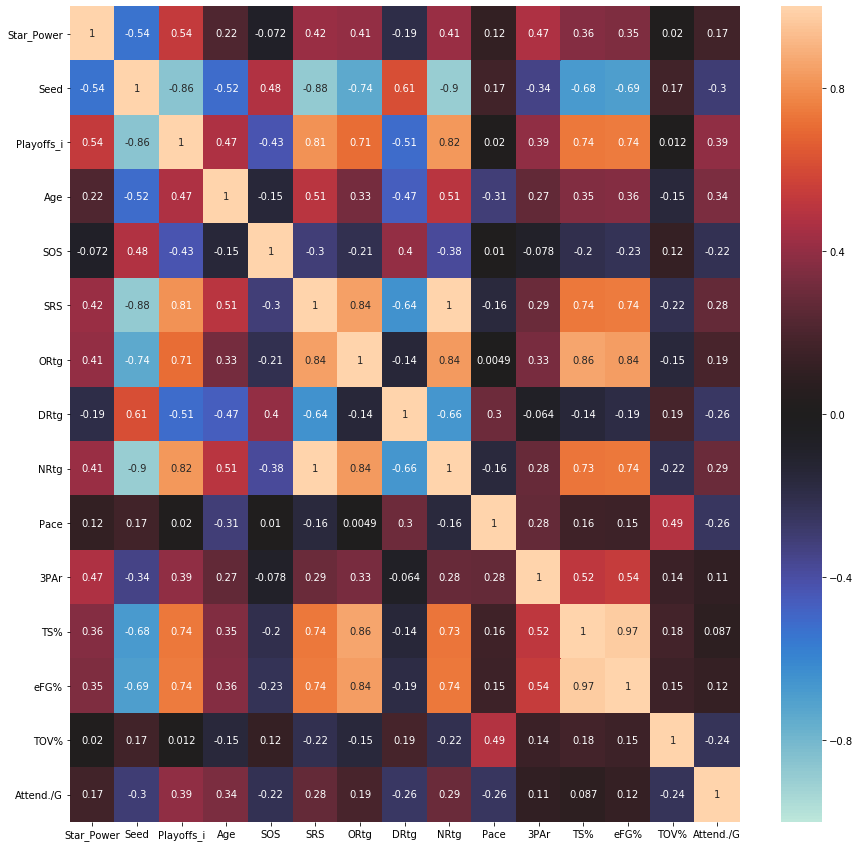

In [39]:
cols2 = [c for c in s2017.columns[22:] if 'op_' not in c]
df2 = s2017[cols2]
plt.figure(figsize=(15, 15))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0)

### Opponent Stats Correlation Heat Map (All Teams)

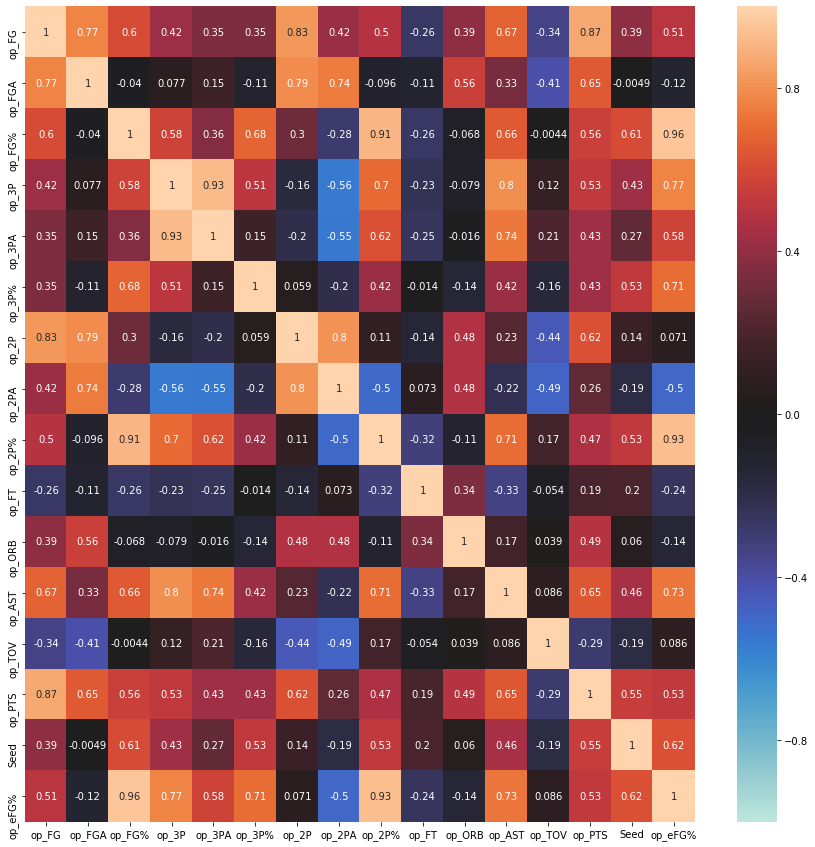

In [40]:
cols = [c for c in s2018.columns if ('op_' in c or 'Seed' in c)]
df = s2018[cols]
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

### Team Stats Correlation Heat Map (Top 4 Teams From Each Conference)

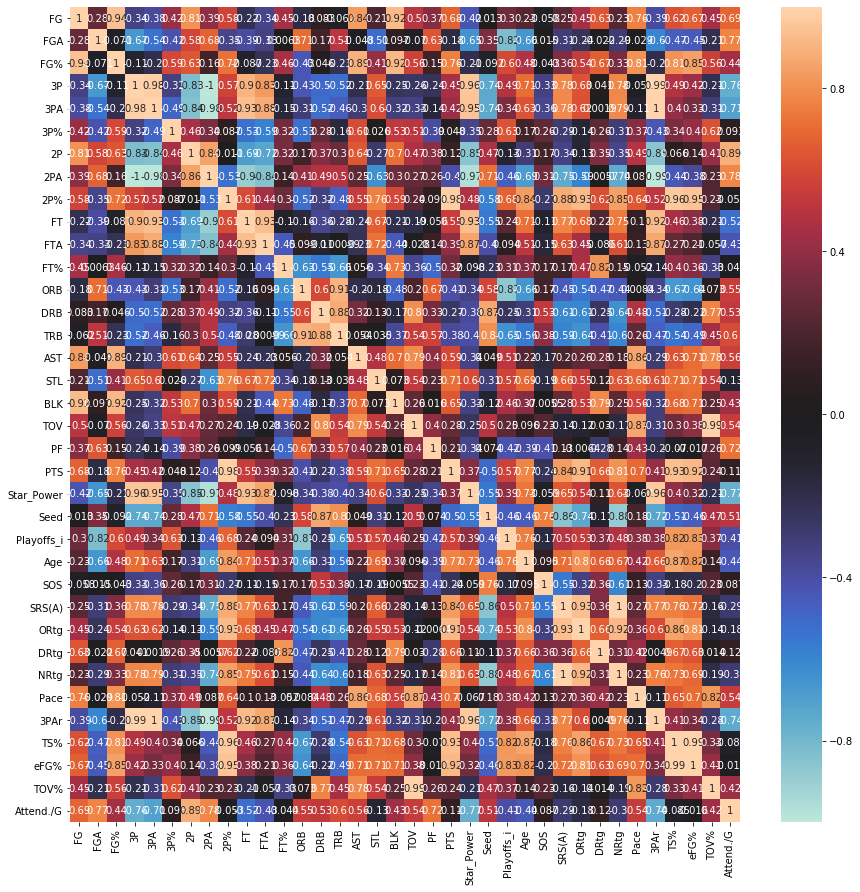

In [41]:
playoff_teams = s2018[(s2018['Seed'] < 4)]
cols3 = [c for c in playoff_teams.columns if 'op_' not in c]
df3 = playoff_teams[cols3]
plt.figure(figsize=(15, 15))
sns.heatmap(df3.corr(), annot = True, vmin=-1, vmax=1, center= 0)

### Team Stats Correlation Heat Map (Bottom 4 Teams From Each Conference)

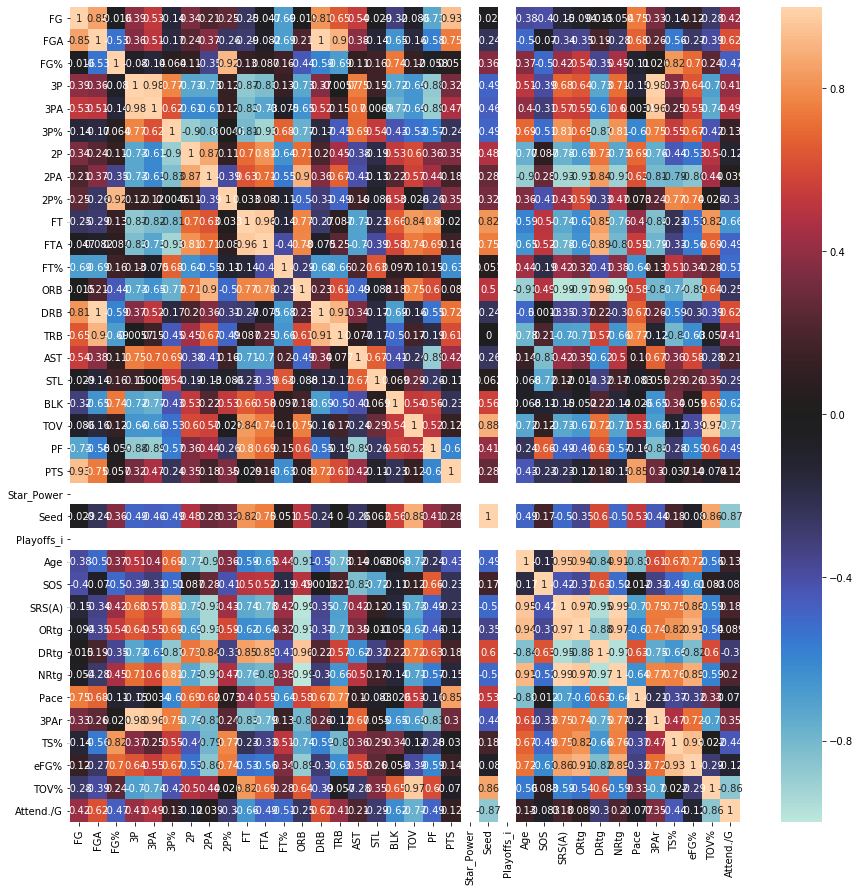

In [42]:
non_playoff_teams = s2018[(s2018['Seed'] > 12)]
cols4 = [c for c in playoff_teams.columns if 'op_' not in c]
df4 = non_playoff_teams[cols3]
plt.figure(figsize=(15, 15))
sns.heatmap(df4.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [46]:
s2018.columns[:36]

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'op_FG', 'op_FGA', 'op_FG%', 'op_3P', 'op_3PA', 'op_3P%', 'op_2P',
       'op_2PA', 'op_2P%', 'op_FT', 'op_ORB', 'op_AST', 'op_TOV', 'op_PTS',
       'Star_Power'],
      dtype='object')

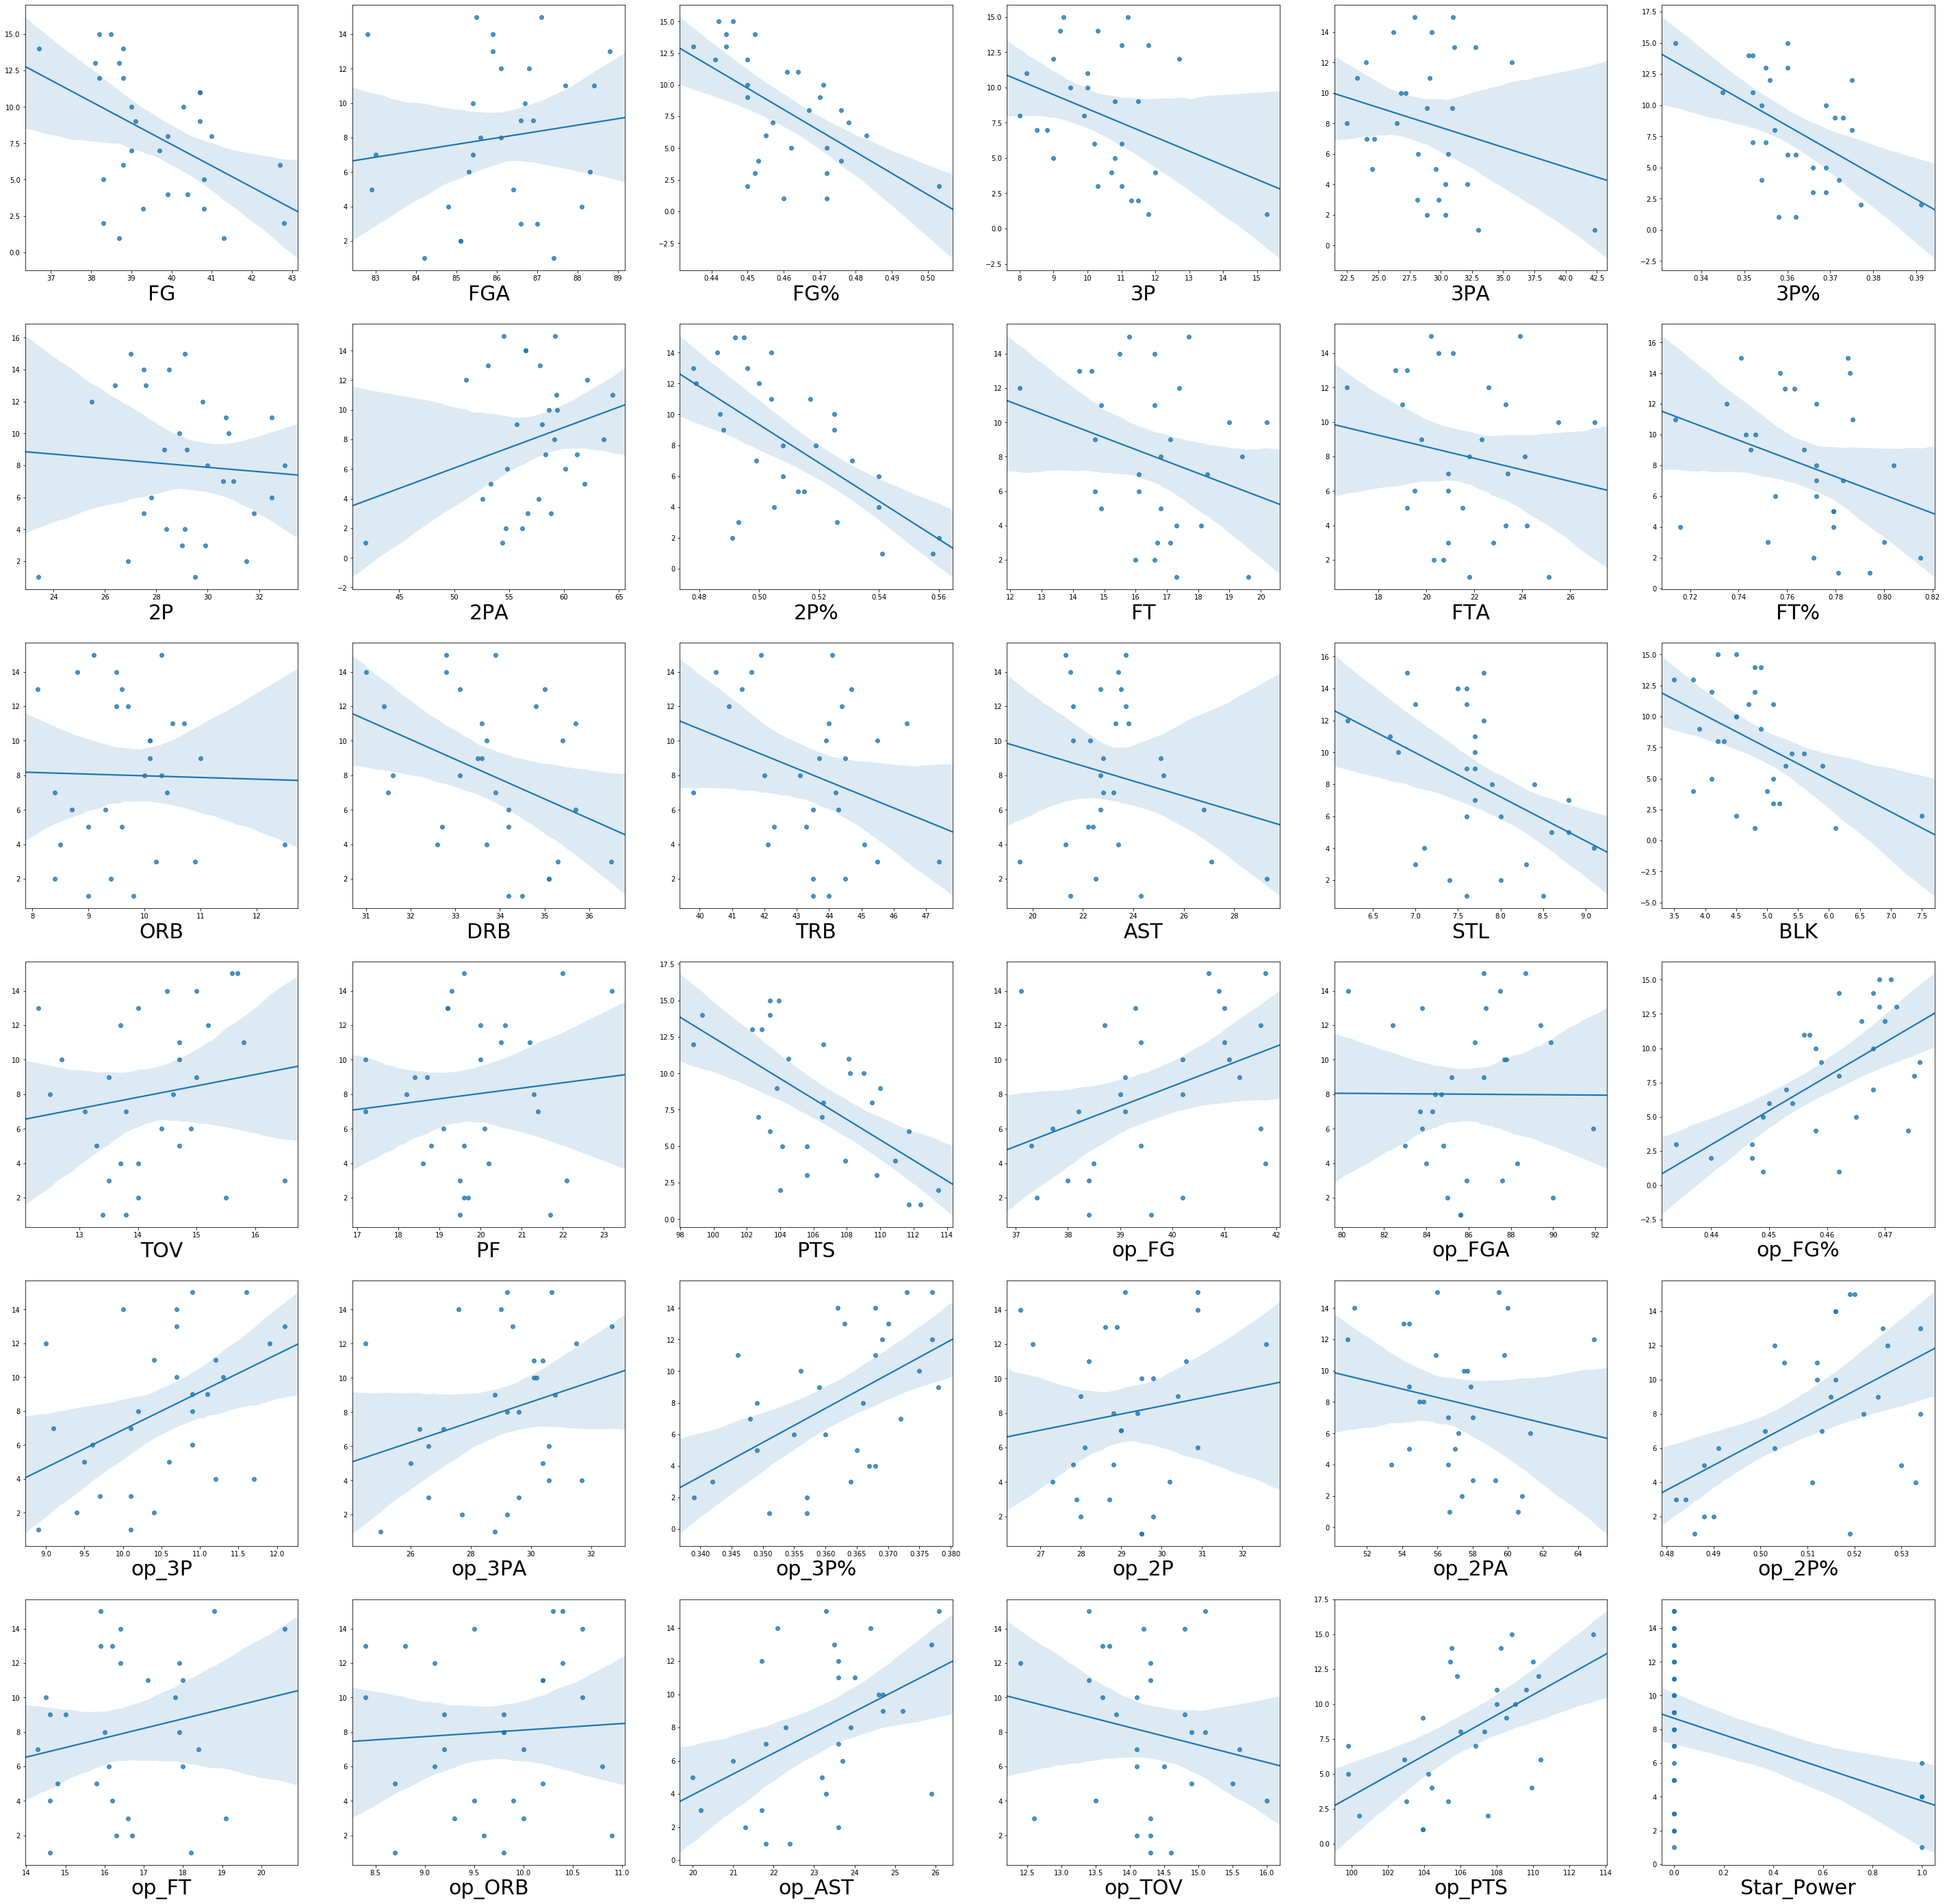

In [47]:
i = 0
fig = plt.figure(figsize=(50, 50))
for s in s2018.columns[:36]:
    ax = fig.add_subplot(6,6, i+1)
    sns.regplot(s, "Seed", data = s2018, ax = ax)
    plt.xlabel(s, fontsize=30)
    plt.ylabel("")
    i = i + 1
# fig.text(0.09, 0.55, 'Seed', va='center', rotation='vertical', fontsize = 75)
plt.show()


## Principal Component Analysis

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### Setup

In [154]:
def getData(year, records):
        y = str(year)
        url='https://www.basketball-reference.com/leagues/NBA_'+y+'.html'
        response=requests.get(url).content
        soup = bs(response)
        basic = soup.find('div',{'id':'all_team-stats-per_game'}).contents[5]
        df = pd.read_html(basic)[0]
        opp = soup.find('div',{'id':'all_opponent-stats-per_game'}).contents[5]
        df2 = pd.read_html(opp)[0]
        misc = soup.find('div',{'id':'all_misc_stats'}).contents[5]
        df3 = pd.read_html(misc)[0]
        df3.columns = df3.columns.droplevel()
        df3 = df3.drop(["Rk", "W", "L", 'PW', 'PL', 'MOV', 'ORB%', 'DRB%', 'FT/FGA', 'Arena', 'Attend.', 'FTr'],axis = 1)
        df3.columns = ['Team', 'Age', 'SOS', 'SRS', 'ORtg', 'DRtg' , 'NRtg', 'Pace', '3PAr' ,'TS%', 'eFG%', 'TOV%', 'op_eFG%', 'op_TOV%', 'Attend./G']
        df3 = df3.drop(["op_TOV%"], axis =1)
        basic = clean(df, False)
        opp = clean(df2, True)
        df3['Team'] = df3['Team'].str.replace(r'*', '')
        adv = df3.set_index("Team")
        df = pd.concat([basic, opp, adv], axis=1, sort = True)
        
        results = {'Lost E. Conf. Finals' :'Conference Finals', 'Lost W. Conf. Finals' : 
          'Conference Finals', 'Lost E. Conf. 1st Rnd.' : '1st Round', 'Lost E. Conf. Semis' : '2nd Round', 
           'Lost W. Conf. Semis' : '2nd Round', 'Lost W. Conf. 1st Rnd.' : '1st Round', 'Lost Finals' : 'Finals',
           'Won Finals': 'Champion', 'DNQ' : 'DNQ'}
        records = records[(records["Season"] == y)].set_index("Team")
        for index, rows in df.iterrows():
            for index2, rows2 in records.iterrows():
                if (index == index2):
                    key = rows2["Playoffs"]
                    rows["Playoffs"] = results.get(key)
                    df.loc[index, "Playoffs"] = rows["Playoffs"]
        df["Seed"] = 0
        df["Playoffs_i"] = 0
        df['Star_Power'] = 0
        df.rename(columns = {'op_2P.1' : 'op_2P%', 'op_3P.1': 'op_3P%'}, inplace = True)
        df.at["League Average","Playoffs"] = 'DNQ'
        df.at["League Average","NRtg"] = 0
        df.drop(['Attend./G'], axis = 1, inplace = True)
        return df

In [155]:
records = pd.read_csv("data/Team_Records.csv")
records["Playoffs"] = records["Playoffs"].fillna("DNQ")
def apply(s):
    s = s.split('-')[0]
    r = int(s) + 1
    return str(r)
records["Season"] = records["Season"].apply(apply)
records['Team'] = records['Team'].str.replace(r'*', '')

In [156]:
data = pd.concat([getData(2005, records), getData(2006, records),getData(2006, records), getData(2007, records), 
                 getData(2008, records), getData(2009, records), getData(2010, records)])
# data = getData(2013, records)
features = data.drop(["Playoffs", "Playoffs_i", "Seed", "Star_Power"], axis = 1).values
labels = data.loc[:,['Playoffs']].values
target_labels = ['DNQ', '1st Round', '2nd Round', 'Conference Finals', 'Finals', 'Champion']
target_labels2020 = ['TBD']
target_df = data[["Playoffs"]].reset_index().drop(["index"], axis = 1)
features = StandardScaler().fit_transform(features)

### Principal Component Analysis (3D)

In [157]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)
df = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2', 'pc3'])
finalDf = pd.concat([df, target_df], axis = 1)
finalDf.tail(10)

,pc1,pc2,pc3,Playoffs
207,0.760081,0.503210,2.562103,1st Round
208,8.104985,2.099827,-0.561038,Conference Finals
209,-2.345497,1.835092,-2.185318,DNQ
210,3.875768,7.659897,3.015692,Conference Finals
211,2.769580,-1.174514,-2.137359,1st Round
212,-3.027580,2.392744,-0.883931,DNQ
213,4.650269,1.467066,-0.569174,2nd Round
214,-0.666870,4.771445,0.253814,DNQ
215,1.731536,1.502598,5.135024,2nd Round
216,-2.429226,0.025631,-2.148351,DNQ


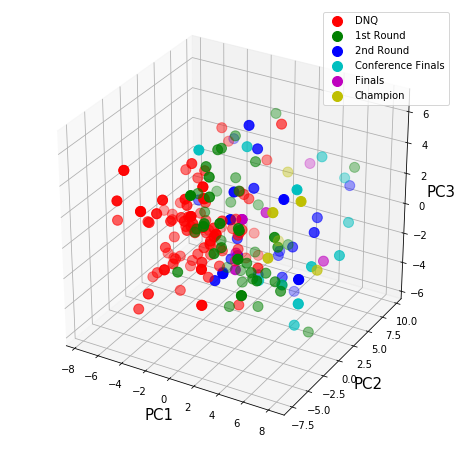

In [158]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection = '3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
colors = ['r', 'g', 'b','c', 'm', 'y']
for target, color in zip(target_labels,colors):
    indicesToKeep = finalDf['Playoffs'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'] ,finalDf.loc[indicesToKeep, 'pc2'],finalDf.loc[indicesToKeep, 'pc3']  , c = color ,s = 100)
ax.legend(target_labels)
ax.grid()

In [159]:
print("PC1 contains", pca.explained_variance_ratio_[0] * 100, "% of the variance")
print("PC2 contains", pca.explained_variance_ratio_[1] * 100, "% of the variance")
print("PC3 contains", pca.explained_variance_ratio_[2] * 100, "% of the variance")

PC1 contains 22.104394348366114 % of the variance
PC2 contains 21.76781113259864 % of the variance
PC3 contains 10.574918198411504 % of the variance


### Principal Component Analysis (2D)

In [160]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
finalDf = pd.concat([df, target_df], axis = 1)
finalDf.tail(10)

,pc1,pc2,Playoffs
207,0.760081,0.503210,1st Round
208,8.104985,2.099827,Conference Finals
209,-2.345497,1.835092,DNQ
210,3.875768,7.659897,Conference Finals
211,2.769580,-1.174514,1st Round
212,-3.027580,2.392744,DNQ
213,4.650269,1.467066,2nd Round
214,-0.666870,4.771445,DNQ
215,1.731536,1.502598,2nd Round
216,-2.429226,0.025631,DNQ


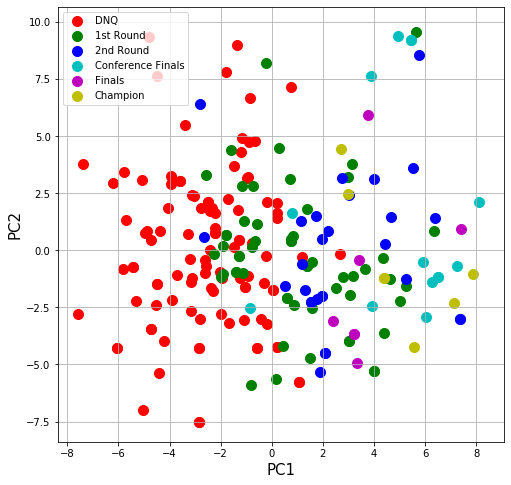

In [161]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
colors = ['r', 'g', 'b','c', 'm', 'y']
for target, color in zip(target_labels,colors):
    indicesToKeep = finalDf['Playoffs'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'] ,finalDf.loc[indicesToKeep, 'pc2'], c = color ,s = 100)
ax.legend(target_labels)
# for i, txt in enumerate(data.index):
#     plt.annotate(txt.split()[-1], (finalDf.iloc[:,0][i], finalDf.iloc[:,1][i]))
ax.grid()

In [162]:
print("PC1 contains", pca.explained_variance_ratio_[0] * 100, "% of the variance")
print("PC2 contains", pca.explained_variance_ratio_[1] * 100, "% of the variance")

PC1 contains 22.104394348366114 % of the variance
PC2 contains 21.76781113259864 % of the variance


## Predictions

In [138]:
from sklearn.neighbors import KNeighborsClassifier 
y = finalDf['Playoffs'].values
X = finalDf.drop('Playoffs', axis=1).values
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [139]:
y_pred = knn.predict(X)

In [140]:
data = getData(2015, records)
features = data.drop(["Playoffs", "Playoffs_i", "Seed", "Star_Power"], axis = 1).values
labels = data.loc[:,['Playoffs']].values
target_labels = ['DNQ', '1st Round', '2nd Round', 'Conference Finals', 'Finals', 'Champion']
target_labels2020 = ['TBD']
target_df = data[["Playoffs"]].reset_index().drop(["index"], axis = 1)
features = StandardScaler().fit_transform(features)

In [141]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
finalDf_2 = pd.concat([df, target_df], axis = 1)

In [142]:
X_new = finalDf_2.drop('Playoffs', axis = 1).values
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction)) 

Prediction: ['1st Round' 'DNQ' 'DNQ' 'DNQ' '1st Round' '1st Round' '1st Round' 'DNQ'
 'DNQ' 'Conference Finals' 'DNQ' '2nd Round' '1st Round' '1st Round' 'DNQ'
 '2nd Round' 'DNQ' '1st Round' 'DNQ' '2nd Round' 'DNQ' '1st Round' 'DNQ'
 'DNQ' '1st Round' '1st Round' 'DNQ' '1st Round' '1st Round' 'DNQ'
 '2nd Round']


In [143]:
predictions = pd.DataFrame(X_new, columns = ['pc1', 'pc2'])
predictions['Playoffs'] = new_prediction.tolist()

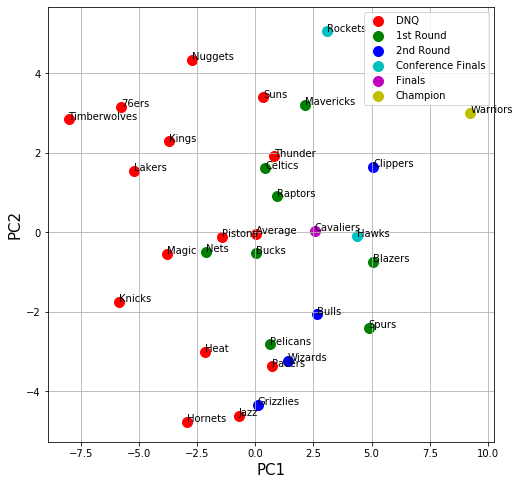

In [144]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
colors = ['r', 'g', 'b','c', 'm', 'y']
for target, color in zip(target_labels,colors):
    indicesToKeep = finalDf_2['Playoffs'] == target
    ax.scatter(finalDf_2.loc[indicesToKeep, 'pc1'] ,finalDf_2.loc[indicesToKeep, 'pc2'], c = color ,s = 100)
ax.legend(target_labels)
for i, txt in enumerate(data.index):
    plt.annotate(txt.split()[-1], (finalDf_2.iloc[:,0][i], finalDf_2.iloc[:,1][i]))
ax.grid()

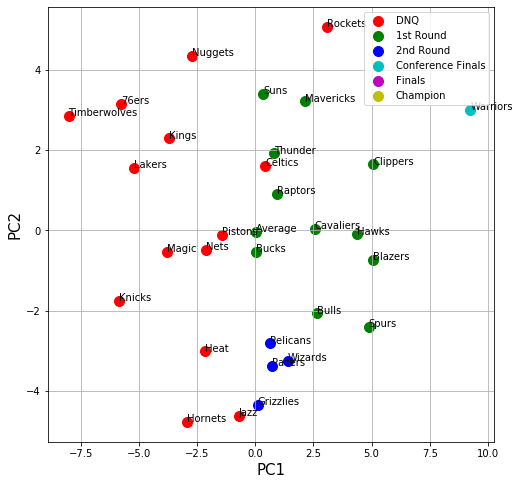

In [145]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
colors = ['r', 'g', 'b','c', 'm', 'y']
for target, color in zip(target_labels,colors):
    indicesToKeep = predictions['Playoffs'] == target
    ax.scatter(predictions.loc[indicesToKeep, 'pc1'] ,predictions.loc[indicesToKeep, 'pc2'], c = color ,s = 100)
ax.legend(target_labels)
for i, txt in enumerate(data.index):
    plt.annotate(txt.split()[-1], (predictions.iloc[:,0][i], predictions.iloc[:,1][i]))
ax.grid()

In [151]:
finalDf_2.head(10)

,pc1,pc2,Playoffs
0,4.374168,-0.100593,Conference Finals
1,0.423922,1.610022,1st Round
2,-2.127622,-0.494669,1st Round
3,-2.924667,-4.763900,DNQ
4,2.669147,-2.066184,2nd Round
5,2.562675,0.038948,Finals
6,2.122964,3.213832,1st Round
7,-2.725523,4.340269,DNQ
8,-1.446546,-0.121229,DNQ
9,9.240012,3.001363,Champion


In [170]:
predictions

,pc1,pc2,Playoffs
0,4.374168,-0.100593,1st Round
1,0.423922,1.610022,DNQ
2,-2.127622,-0.494669,DNQ
3,-2.924667,-4.763900,DNQ
4,2.669147,-2.066184,1st Round
5,2.562675,0.038948,1st Round
6,2.122964,3.213832,1st Round
7,-2.725523,4.340269,DNQ
8,-1.446546,-0.121229,DNQ
9,9.240012,3.001363,Conference Finals


In [148]:
knn.score(X_new, finalDf['Playoffs'])

0.5806451612903226

## Conclusions

The issue with the classifier used is that majority of the data points fall under the cluster of either 'DNQ' or '1st Round'. To improve this classification I would need to take into account the fact that the number of data points in each cluster or pretermined. That is, I know there is 1 'Champion' , 2 'Conference Finals' labels, etc. One way to accomplish this would be as follows:                                                                                  1) identify cluster centroids from training data.                                                                      2) iteratively find distances between test data points and cluster centroids.                                          3) pick the k closest points to each cluster centroid and label appropriately where k represents the cluster size for each label

In [219]:
from scipy.spatial import distance
cluster_size = [14,8,4,2,1,1]
i=0
predictions['better'] = ''
predictions['taken'] = ''
copy = predictions
for s in target_labels:
    x = finalDf[(finalDf.Playoffs == s)]['pc1'].mean()
    y = finalDf[(finalDf.Playoffs == s)]['pc2'].mean()
    center = [[x,y]]
    copy = copy[(copy.taken != 'Yes')]
#     print(copy)
    c = list(zip(copy['pc1'],copy['pc2']))
    print(len(c))
    lst = distance.cdist(np.array(c), center, 'euclidean').flatten()
    for j in range(0,cluster_size[i]):
        predictions.iloc[np.argmin(lst),3] = s
        print(predictions)
        copy.iloc[np.argmin(lst),4] = 'Yes'
        lst = np.delete(lst,np.argmin(lst))
    i = i + 1

31
         pc1       pc2           Playoffs better taken
0   4.374168 -0.100593          1st Round             
1   0.423922  1.610022                DNQ             
2  -2.127622 -0.494669                DNQ    DNQ      
3  -2.924667 -4.763900                DNQ             
4   2.669147 -2.066184          1st Round             
5   2.562675  0.038948          1st Round             
6   2.122964  3.213832          1st Round             
7  -2.725523  4.340269                DNQ             
8  -1.446546 -0.121229                DNQ             
9   9.240012  3.001363  Conference Finals             
10  3.101527  5.061612                DNQ             
11  0.706533 -3.375253          2nd Round             
12  0.010669 -0.038766          1st Round             
13  5.077822  1.643695          1st Round             
14 -5.208077  1.548371                DNQ             
15  0.108977 -4.351738          2nd Round             
16 -2.153459 -3.013019                DNQ             
17  0.0

         pc1       pc2           Playoffs     better taken
0   4.374168 -0.100593          1st Round  1st Round      
1   0.423922  1.610022                DNQ  1st Round      
2  -2.127622 -0.494669                DNQ  1st Round      
3  -2.924667 -4.763900                DNQ  1st Round      
4   2.669147 -2.066184          1st Round  2nd Round      
5   2.562675  0.038948          1st Round        DNQ      
6   2.122964  3.213832          1st Round                 
7  -2.725523  4.340269                DNQ        DNQ      
8  -1.446546 -0.121229                DNQ  2nd Round      
9   9.240012  3.001363  Conference Finals  1st Round      
10  3.101527  5.061612                DNQ        DNQ      
11  0.706533 -3.375253          2nd Round        DNQ      
12  0.010669 -0.038766          1st Round        DNQ      
13  5.077822  1.643695          1st Round  1st Round      
14 -5.208077  1.548371                DNQ        DNQ      
15  0.108977 -4.351738          2nd Round  1st Round    

In [216]:
predictions

,pc1,pc2,Playoffs,better,taken
0,4.374168,-0.100593,1st Round,Conference Finals,
1,0.423922,1.610022,DNQ,1st Round,
2,-2.127622,-0.494669,DNQ,Champion,
3,-2.924667,-4.763900,DNQ,Conference Finals,
4,2.669147,-2.066184,1st Round,2nd Round,
5,2.562675,0.038948,1st Round,Finals,
6,2.122964,3.213832,1st Round,,
7,-2.725523,4.340269,DNQ,DNQ,
8,-1.446546,-0.121229,DNQ,2nd Round,
9,9.240012,3.001363,Conference Finals,1st Round,
